In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
train_data = pd.read_csv("Data/CE802_P3_Data.csv",sep=',')
test_data = pd.read_csv("Data/CE802_P3_Test.csv",sep=',')
file_name="Data/CE802_P3_Test_SVM.csv"


Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,Very high,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,Medium,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,Medium,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,Very high,-22863.72,-3.12,-54.36,2424.42,109.19


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,NaN


In [4]:

cleanup = {"F12": {"Very low":1, "Low":2, "Medium":3, "High":4, "Very high":5}}
train_data = train_data.replace(cleanup)
# train_data['Target'] = train_data['Target'].replace([0.00],0.1) 
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,4,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,1,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,2,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,2,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,1,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,5,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,3,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,3,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,5,-22863.72,-3.12,-54.36,2424.42,109.19


In [5]:
test = test_data.replace(cleanup)
test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,2,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,3,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,2,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,4,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,2,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,5,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,1,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,2,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,3,-13748.25,-9.21,-18.96,1261.38,NaN


In [6]:
train_data = pd.get_dummies(train_data, columns= ['F4'])
train_data.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F4_Europe,F4_Rest,F4_UK,F4_USA
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,4,-15085.87,-12.93,-39.42,1734.58,3616.82,0,1,0,0
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,1,-15782.44,-8.55,-35.61,1672.70,3342.88,0,1,0,0
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,2,-10526.01,-9.66,-29.10,1462.86,0.00,0,0,1,0
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,2,-8327.14,-19.23,-34.59,809.46,1742.65,0,0,1,0
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,1,-14434.13,-9.45,-46.14,1435.90,373.56,0,0,0,1


In [7]:
test = pd.get_dummies(test, columns= ['F4'])
test.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F4_Europe,F4_Rest,F4_UK,F4_USA
0,28.70,0.82,-115.06,-280.95,581.10,0.06,214.35,2,2,-0.88,2,-14794.01,-15.09,-35.61,1578.68,NaN,0,0,0,1
1,5.40,6.90,-170.24,-228.00,330.54,0.31,-164.98,1,9,0.28,3,-11632.88,0.72,-29.73,1647.02,NaN,0,1,0,0
2,21.96,4.40,-219.12,-59.67,662.28,4.98,281.54,6,5,5.82,2,-12631.29,-23.61,-32.73,1449.14,NaN,0,1,0,0
3,10.52,1.02,-184.14,-211.23,506.55,0.57,-311.96,7,5,1.92,4,-26664.88,1.80,-22.92,911.98,NaN,0,0,1,0
4,2.00,0.58,-190.56,-284.82,649.41,0.05,291.47,8,3,-0.02,2,-9901.41,-13.47,-48.81,2251.04,NaN,0,1,0,0


In [8]:
X = train_data.drop('Target', axis=1)
y = train_data['Target'].values
y=y.reshape(-1,1)
X_test=test.drop('Target',axis=1)

In [9]:
y

array([[3616.82],
       [3342.88],
       [   0.  ],
       ...,
       [ 323.67],
       [ 109.19],
       [   0.  ]])

In [10]:
x_scaler = StandardScaler()
X=x_scaler.fit_transform(X)
y_scaler = StandardScaler()
y=y_scaler.fit_transform(y)
X_test=x_scaler.fit_transform(X_test)

In [11]:
X_train, X_valid, y_train, y_valid =train_test_split(X, y,test_size = 0.2)

In [12]:
parameters = {'kernel':['rbf','linear','poly'], 'C':np.arange(start=0.1, stop=5, step=0.1 )}

In [13]:
lsvr = SVR(kernel='rbf', C=2.5, gamma=0.03,epsilon=0.01)
clf = GridSearchCV(lsvr, parameters,cv=5, return_train_score=True, scoring="r2", verbose=1, n_jobs=-1)
clf.fit(X_train, y_train.ravel())
clf.best_params_
lsvr=clf.best_estimator_
print(lsvr)
cv_mse_lsvr=round(clf.cv_results_['mean_test_score'].mean(),3)
print(cv_mse_lsvr)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:  1.7min finished


SVR(C=4.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.03,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.773


In [14]:
lsvr.fit(X_train, y_train.ravel())

score = lsvr.score(X_train, y_train.ravel())
print("R-squared:", score)


R-squared: 0.977567776576294


In [15]:
cv_score = cross_val_score(lsvr, X, y.ravel(), cv = 5,scoring='r2')
print("CV mean score: ", cv_score.mean())

CV mean score:  0.8946174697740169


In [16]:
ypred = lsvr.predict(X_valid)

mse = mean_squared_error(ypred, y_valid)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  0.11366804344979613
RMSE:  0.056834021724898064


In [17]:
# ypred=[it for it in ypred]
# y_valid=[it for it in y_valid.ravel()]
# y_valid

In [18]:
# y_scaler.inverse_transform(ypred.reshape(-1,1)).ravel()

In [19]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Record':range(0,len(y_valid)),'Actual': y_scaler.inverse_transform(y_valid.reshape(-1,1)).ravel(), 'Predicted': y_scaler.inverse_transform(ypred)})
df1 = df.head(50)
 
df1.set_index('Record',inplace=True)
df1

,Actual,Predicted
Record,,
0,1609.96,1398.272928
1,789.57,944.345021
2,0.00,-76.467585
3,901.44,949.095566
4,678.37,647.931263
5,0.00,-667.438397
6,0.00,19.902660
7,0.00,-50.497228
8,78.22,108.703000


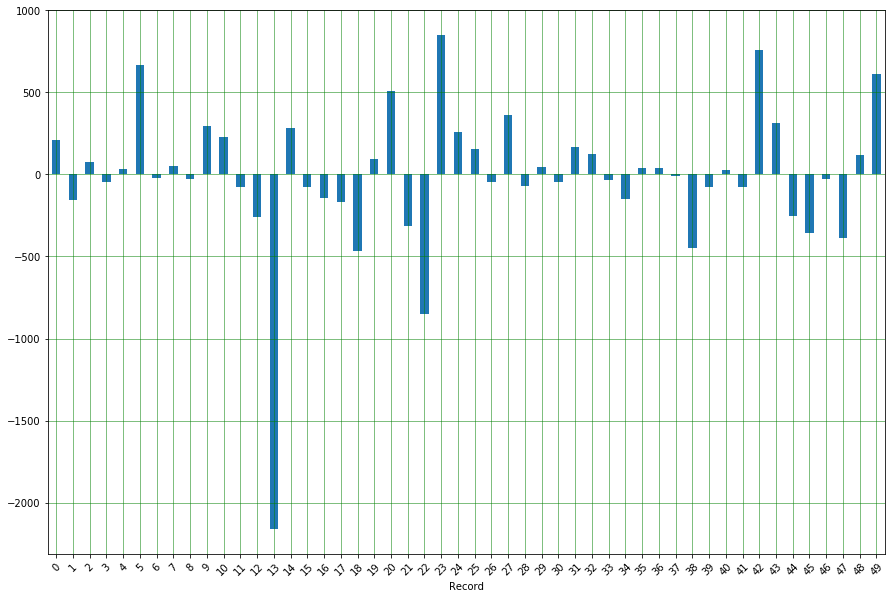

In [20]:
error = df1['Actual'] - df1['Predicted']

# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

In [21]:
from sklearn.metrics import r2_score
r2_score(ypred, y_valid)

0.8703547745808328

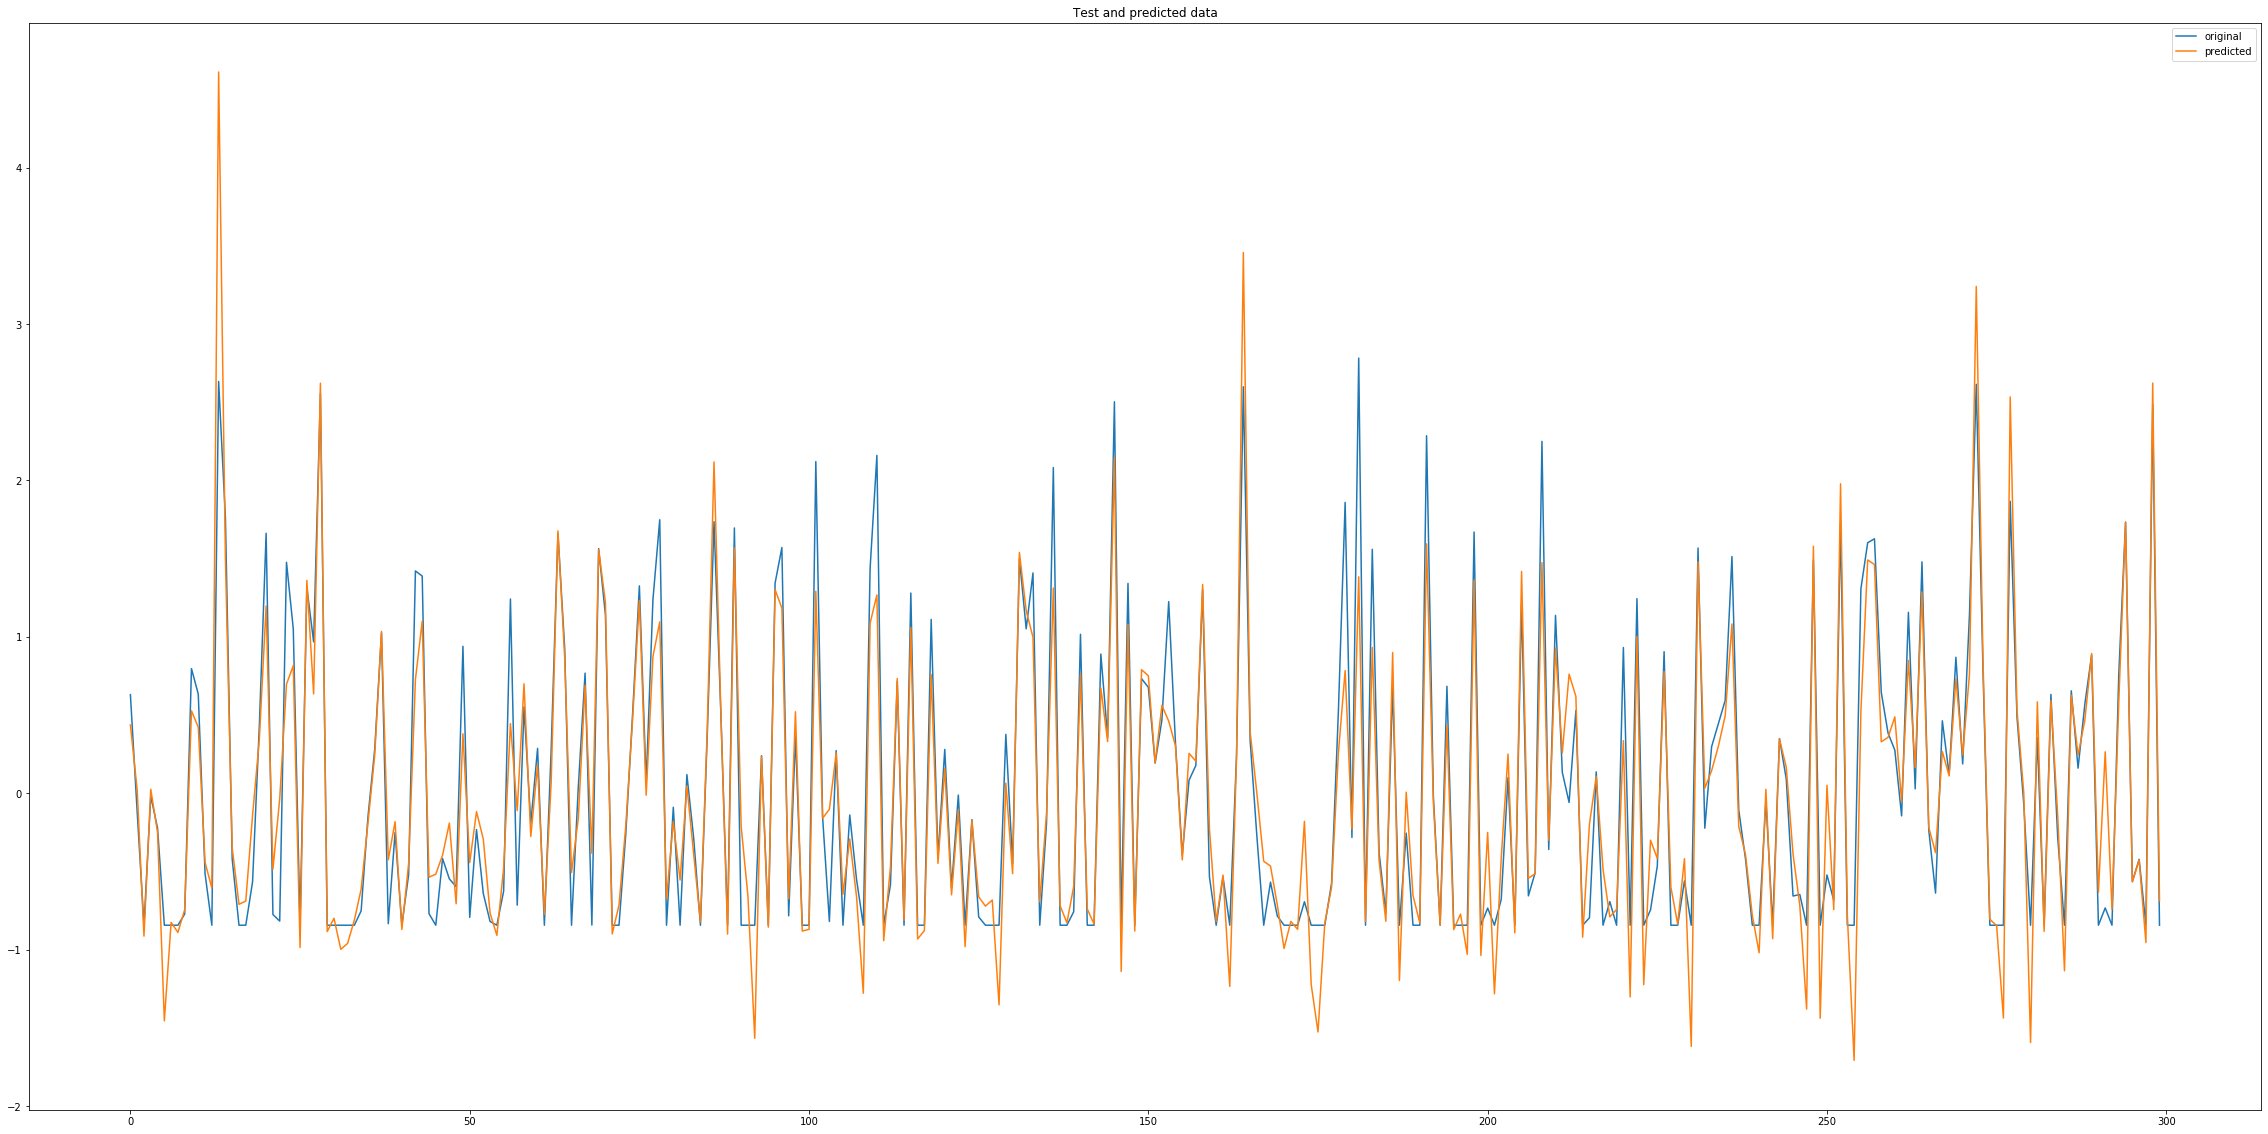

In [22]:
x_ax = range(len(y_valid))
plt.figure(figsize=(40, 20))
plt.plot(x_ax, y_valid, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

In [23]:
y_predict = y_scaler.inverse_transform(lsvr.predict(X_test).reshape(-1,1)).ravel()   
y_predict
for i in range(0,len(y_predict)):
    test_data.loc[i,'Target']=y_predict[i]


In [24]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,450.976098
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,-242.643125
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,3069.958287
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,2537.635655
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,-510.301411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,4744.620293
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,1272.160892
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,546.911079
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,-306.557980


In [25]:
test_data.to_csv(file_name, sep=',')

https://www.datatechnotes.com/2020/07/regression-example-with-linear-svr.html

https://stackabuse.com/change-figure-size-in-matplotlib/

https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/

https://www.datatechnotes.com/2020/07/regression-example-with-linear-svr.html
https://itnext.io/learning-data-science-predict-stock-price-with-support-vector-regression-svr-2c4fdc36662